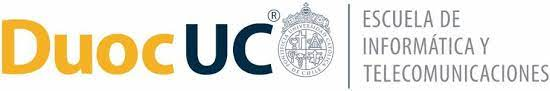

# Examen Transversal: Caso respectivo


Integrantes:
*
*

Docente:     

Sección: DLY0100 -

## Parte 1. Implementación de Red Feed Fordward Fully Connected (MLP)


Importar librerías necesarias, lectura de archivos, implementación y construcción de la red neuronal artificial.

Probar con diferentes funciones de activación y elegir alguna justificando su decisión. Modificar la cantidad de capas, la cantidad de épocas y neuronas por capa y registrar a continuación algunos resultados de la ejecución con sus respectivos hiperparámetros.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


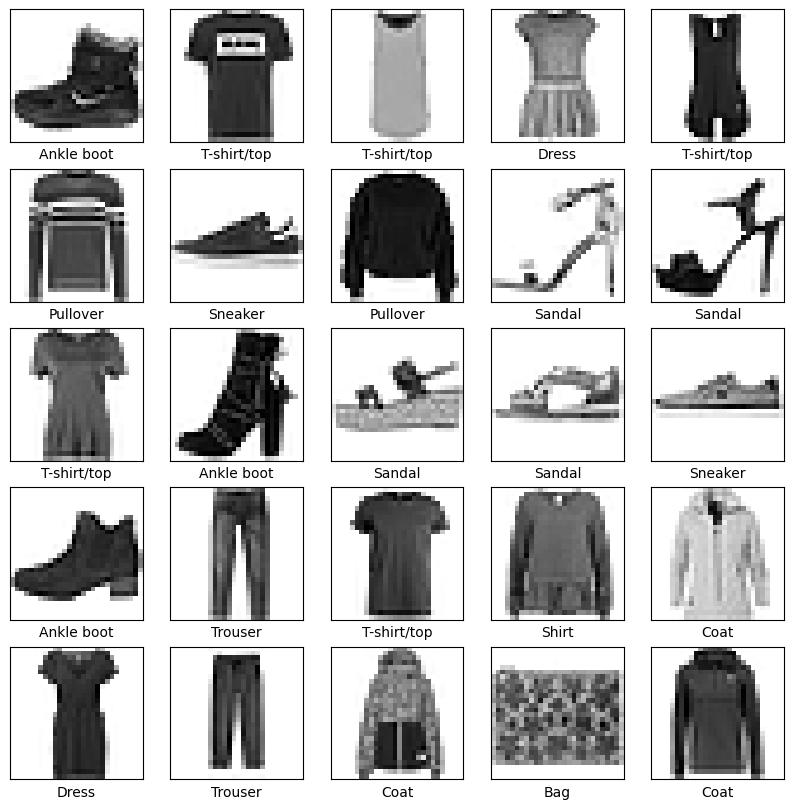

In [ ]:
#####################################################################
# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

# Cargar el dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convertir las etiquetas a categorías (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Función para visualizar algunas imágenes del dataset
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar las primeras 25 imágenes del conjunto de entrenamiento
plot_sample_images(train_images, train_labels.argmax(axis=1), class_names)


#####################################################################

##Modelo_1 MLP con funcion de activacion (relu y sigmoide)

* Capas :4

    **Flatten**(input_shape=(28, 28)),Capa Entrada

    **Dense**(128, activation='relu'),Capa Oculta

    **Dense**(64, activation='sigmoid'),Capa oculta

    **Dense**(10, activation='softmax')Capa de salisa

* optimizer='RMsProp'

* epocas:10

* neuronas por capa:

    Dense(**128**, activation='relu'),

    Dense(**64**, activation='sigmoid'),
    
    Dense(**10**, activation='softmax')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Crear el modelo ReLU-Sigmoid
model_relu_sigmoid = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])


# Mostrar la arquitectura del modelo
print("Arquitectura del modelo ReLU-Sigmoid:")
model_relu_sigmoid.summary()

Arquitectura del modelo ReLU-Sigmoid:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model_relu_sigmoid.compile(optimizer='RMsProp',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Entrenar el modelo
history_relu_sigmoid = model_relu_sigmoid.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.5251 - accuracy: 0.8173 - val_loss: 0.4393 - val_accuracy: 0.8399 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.3804 - accuracy: 0.8608 - val_loss: 0.3997 - val_accuracy: 0.8537 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.3432 - accuracy: 0.8741 - val_loss: 0.3727 - val_accuracy: 0.8642 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 7s - loss: 0.3207 - accuracy: 0.8826 - val_loss: 0.3503 - val_accuracy: 0.8711 - 7s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.3049 - accuracy: 0.8881 - val_loss: 0.3594 - val_accuracy: 0.8736 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 7s - loss: 0.2933 - accuracy: 0.8925 - val_loss: 0.3826 - val_accuracy: 0.8646 - 7s/epoch - 4ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.2827 - accuracy: 0.8957 - val_loss: 0.3462 - val_accuracy: 0.8792 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 7s - loss: 0.2759 - accuracy: 0.8982 - val_loss: 0.3511 - val_accuracy: 0.8801 - 7s/epoch - 4ms/step
Epoch 9/

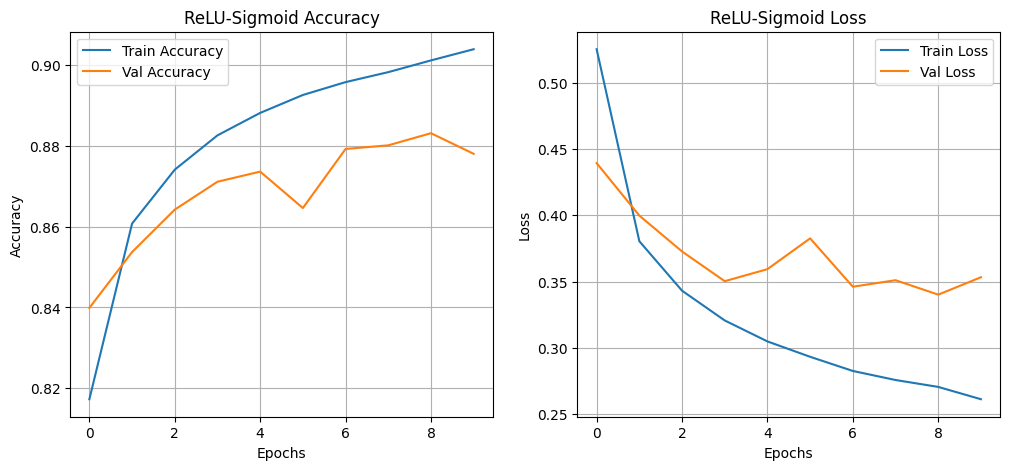

In [ ]:
# Función para graficar los resultados de precisión y pérdida
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Gráfica de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.grid()

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Graficar resultados del modelo ReLU-Sigmoid
plot_model_history(history_relu_sigmoid, "ReLU-Sigmoid")


In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
train_loss_relu_sigmoid, train_accuracy_relu_sigmoid = model_relu_sigmoid.evaluate(train_images, train_labels, verbose=2)
# Evaluar el modelo en el conjunto de prueba
test_loss_relu_sigmoid, test_accuracy_relu_sigmoid = model_relu_sigmoid.evaluate(test_images, test_labels, verbose=2)

print(f"ReLU-Sigmoid - Entrenamiento: Precisión = {train_accuracy_relu_sigmoid:.4f}, Pérdida = {train_loss_relu_sigmoid:.4f}")
print(f"ReLU-Sigmoid - Prueba: Precisión = {test_accuracy_relu_sigmoid:.4f}, Pérdida = {test_loss_relu_sigmoid:.4f}")


1875/1875 - 8s - loss: 0.2132 - accuracy: 0.9212 - 8s/epoch - 4ms/step
313/313 - 1s - loss: 0.3215 - accuracy: 0.8887 - 516ms/epoch - 2ms/step
ReLU-Sigmoid - Entrenamiento: Precisión = 0.9212, Pérdida = 0.2132
ReLU-Sigmoid - Prueba: Precisión = 0.8887, Pérdida = 0.3215


**Observacion:**

**Resultados del Entrenamiento y Prueba**

Precisión de Entrenamiento: 92.12%

Pérdida de Entrenamiento: 0.2132

Precisión de Prueba: 0,8887

Pérdida de Prueba: 0.3215

Una precisión del 92.12% en el conjunto de entrenamiento sugiere que el modelo ha aprendido bien las características presentes en los datos de entrenamiento. La baja pérdida de entrenamiento (0.2132) también respalda esta conclusión.

La diferencia entre la precisión de entrenamiento (92.11%) y la precisión de prueba (88,88%) indica que el modelo tiene un rendimiento ligeramente inferior en datos no vistos anteriormente (prueba) en comparación con los datos de entrenamiento.
Aunque hay una disminución en la precisión, esta diferencia no es excesivamente grande, lo que sugiere que el modelo generaliza razonablemente bien.

##Modelo_2 MLP con funcion de activacion (relu y tanh)
:

 - Se cambia la funcion de activacion de sigmoid a Tahn
- Se aumentan las epocas de 10 a 15  
- Aumenta capa densa de 3 a 4
* Capas :5

    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])


* optimizer='optimizer='sgd'

* epocas:15   

* neuronas por capa:

    Dense(**256**, activation='relu'),
    Dense(**128**, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(**10**, activation='softmax')


In [ ]:
# Crear el modelo ReLU-Tanh
model_relu_tanh = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])


# Mostrar la arquitectura del modelo
print("Arquitectura del modelo ReLU-Tanh:")
model_relu_tanh.summary()


Arquitectura del modelo ReLU-Tanh:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               200960    
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________

In [ ]:
# Compilar el modelo
model_relu_tanh.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Entrenar el modelo
history_relu_tanh = model_relu_tanh.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/15
1875/1875 - 8s - loss: 0.6641 - accuracy: 0.7822 - val_loss: 0.5048 - val_accuracy: 0.8205 - 8s/epoch - 4ms/step
Epoch 2/15
1875/1875 - 7s - loss: 0.4522 - accuracy: 0.8399 - val_loss: 0.4545 - val_accuracy: 0.8348 - 7s/epoch - 4ms/step
Epoch 3/15
1875/1875 - 7s - loss: 0.4080 - accuracy: 0.8553 - val_loss: 0.4211 - val_accuracy: 0.8457 - 7s/epoch - 4ms/step
Epoch 4/15
1875/1875 - 7s - loss: 0.3815 - accuracy: 0.8637 - val_loss: 0.4234 - val_accuracy: 0.8483 - 7s/epoch - 4ms/step
Epoch 5/15
1875/1875 - 8s - loss: 0.3634 - accuracy: 0.8698 - val_loss: 0.3995 - val_accuracy: 0.8524 - 8s/epoch - 4ms/step
Epoch 6/15
1875/1875 - 6s - loss: 0.3489 - accuracy: 0.8736 - val_loss: 0.3769 - val_accuracy: 0.8631 - 6s/epoch - 3ms/step
Epoch 7/15
1875/1875 - 8s - loss: 0.3358 - accuracy: 0.8788 - val_loss: 0.3779 - val_accuracy: 0.8669 - 8s/epoch - 4ms/step
Epoch 8/15
1875/1875 - 6s - loss: 0.3239 - accuracy: 0.8820 - val_loss: 0.3631 - val_accuracy: 0.8698 - 6s/epoch - 3ms/step
Epoch 9/

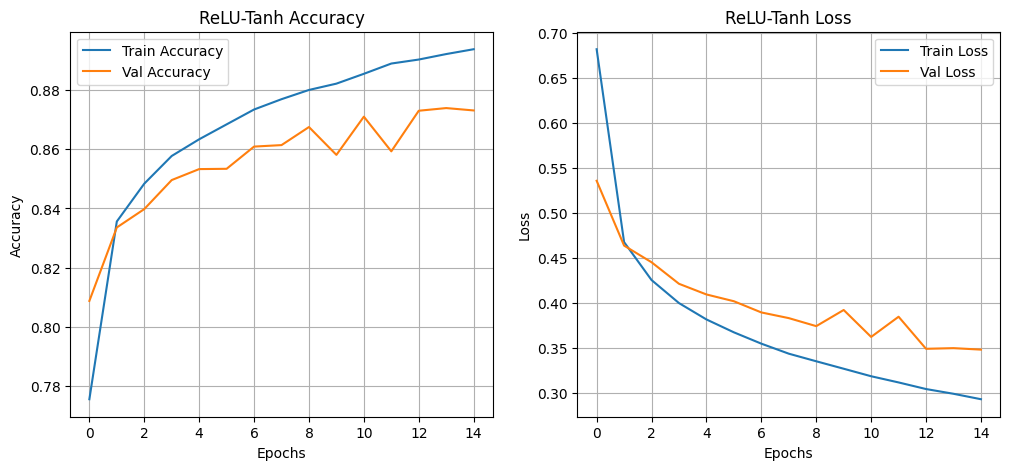

In [ ]:
# Graficar resultados del modelo ReLU-Tanh
plot_model_history(history_relu_tanh, "ReLU-Tanh")

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
train_loss_relu_tanh, train_accuracy_relu_tanh = model_relu_tanh.evaluate(train_images, train_labels, verbose=2)
# Evaluar el modelo en el conjunto de prueba
test_loss_relu_tanh, test_accuracy_relu_tanh = model_relu_tanh.evaluate(test_images, test_labels, verbose=2)

print(f"ReLU-Tanh - Entrenamiento: Precisión = {train_accuracy_relu_tanh:.4f}, Pérdida = {train_loss_relu_tanh:.4f}")
print(f"ReLU-Tanh - Prueba: Precisión = {test_accuracy_relu_tanh:.4f}, Pérdida = {test_loss_relu_tanh:.4f}")


1875/1875 - 5s - loss: 0.2811 - accuracy: 0.8984 - 5s/epoch - 2ms/step
313/313 - 1s - loss: 0.3479 - accuracy: 0.8731 - 531ms/epoch - 2ms/step
ReLU-Tanh - Entrenamiento: Precisión = 0.8984, Pérdida = 0.2811
ReLU-Tanh - Prueba: Precisión = 0.8731, Pérdida = 0.3479


**Observacion:**

*Análisis del Modelo ReLU-Tanh*

Resultados del Entrenamiento y Prueba

Precisión de Entrenamiento: 0.8984

Precisión de Prueba: 0,8731

Pérdida de Entrenamiento: 0.2811

Pérdida de Prueba: 0.3479

Una precisión del 0.8984 en el conjunto de entrenamiento sugiere que el modelo ha aprendido bien las características presentes en los datos de entrenamiento. La baja pérdida de entrenamiento (0.2811) también respalda esta conclusión pero hay entre la perdida de prueba (0,3479) y la precisión de prueba (0,8984) indica que el modelo tiene un rendimiento ligeramente inferior en datos no vistos anteriormente (prueba) en comparación con los datos de entrenamiento.
Aunque hay una disminución en la precisión, esta diferencia es mayor que el modelo anterior, pero  lo que sugiere que el modelo generaliza razonablemente bien, pero aún puede estar ligeramente sobreajustado.


##Modelo_3 MLP con funcion de activacion (sigmoide,sigmoide y tanh)

 epochs=20

 Capas= 5

    **Flatten(input_shape=(28, 28)),
    **Dense**(512, activation='sigmoid'),
    **Dense**(256, activation='sigmoid'),
    **Dense(128, activation='tanh'),
    **Dense**(10, activation='softmax')

Neuronas por capa

    **Flatten(input_shape=(28, 28)),
    **Dense**(512, activation='sigmoid'),
    **Dense**(256, activation='sigmoid'),
    **Dense(128, activation='tanh'),
    **Dense**(10, activation='softmax')

batch_size=128

optimizar= Adam

In [ ]:
# Crear el modelo Sigmoid-Tanh
model_sigmoid_tanh = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='tanh'),
    Dense(10, activation='softmax')
])


# Mostrar la arquitectura del modelo
print("Arquitectura del modelo Sigmoid-Tanh:")
model_sigmoid_tanh.summary()



Arquitectura del modelo Sigmoid-Tanh:
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 512)               401920    
                                                                 
 dense_47 (Dense)            (None, 256)               131328    
                                                                 
 dense_48 (Dense)            (None, 128)               32896     
                                                                 
 dense_49 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________________

In [ ]:
# Compilar el modelo
model_sigmoid_tanh.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Entrenar el modelo
history_sigmoid_tanh = model_sigmoid_tanh.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/20
469/469 - 4s - loss: 0.6645 - accuracy: 0.7701 - val_loss: 0.4691 - val_accuracy: 0.8327 - 4s/epoch - 9ms/step
Epoch 2/20
469/469 - 4s - loss: 0.4151 - accuracy: 0.8503 - val_loss: 0.4159 - val_accuracy: 0.8479 - 4s/epoch - 8ms/step
Epoch 3/20
469/469 - 4s - loss: 0.3728 - accuracy: 0.8648 - val_loss: 0.3927 - val_accuracy: 0.8604 - 4s/epoch - 9ms/step
Epoch 4/20
469/469 - 3s - loss: 0.3477 - accuracy: 0.8732 - val_loss: 0.3840 - val_accuracy: 0.8623 - 3s/epoch - 7ms/step
Epoch 5/20
469/469 - 3s - loss: 0.3317 - accuracy: 0.8790 - val_loss: 0.3777 - val_accuracy: 0.8673 - 3s/epoch - 7ms/step
Epoch 6/20
469/469 - 4s - loss: 0.3127 - accuracy: 0.8864 - val_loss: 0.3704 - val_accuracy: 0.8670 - 4s/epoch - 9ms/step
Epoch 7/20
469/469 - 3s - loss: 0.3024 - accuracy: 0.8884 - val_loss: 0.3533 - val_accuracy: 0.8728 - 3s/epoch - 7ms/step
Epoch 8/20
469/469 - 3s - loss: 0.2878 - accuracy: 0.8933 - val_loss: 0.3536 - val_accuracy: 0.8693 - 3s/epoch - 7ms/step
Epoch 9/20
469/469 - 3s 

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {  } & \text { Relu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{ 2 capas ocultas }& {9} & {0,8887} & {} & {} & {} & {} \\
\text{ _2_ capas ocultas } & {3} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {3} & {} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

Para completar la tabla en LaTeX seguir los siguientes pasos:

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:

* Ejemplo:\hline \text{ 2 capas ocultas }& {7.2} & {8.0} & {1.3} & {3.5} & {0.8} & {5.1}

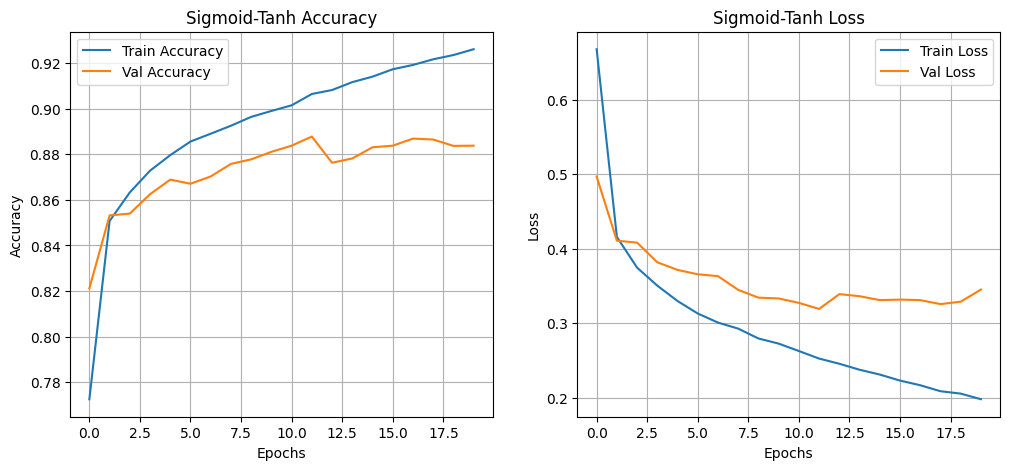

In [ ]:

# Graficar resultados del modelo Sigmoid-Tanh
plot_model_history(history_sigmoid_tanh, "Sigmoid-Tanh")

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
train_loss_sigmoid_tanh, train_accuracy_sigmoid_tanh = model_sigmoid_tanh.evaluate(train_images, train_labels, verbose=2)
# Evaluar el modelo en el conjunto de prueba
test_loss_sigmoid_tanh, test_accuracy_sigmoid_tanh = model_sigmoid_tanh.evaluate(test_images, test_labels, verbose=2)

print(f"Sigmoid-Tanh - Entrenamiento: Precisión = {train_accuracy_sigmoid_tanh:.4f}, Pérdida = {train_loss_sigmoid_tanh:.4f}")
print(f"Sigmoid-Tanh - Prueba: Precisión = {test_accuracy_sigmoid_tanh:.4f}, Pérdida = {test_loss_sigmoid_tanh:.4f}")


1875/1875 - 3s - loss: 0.1954 - accuracy: 0.9263 - 3s/epoch - 2ms/step
313/313 - 1s - loss: 0.3453 - accuracy: 0.8838 - 565ms/epoch - 2ms/step
Sigmoid-Tanh - Entrenamiento: Precisión = 0.9263, Pérdida = 0.1954
Sigmoid-Tanh - Prueba: Precisión = 0.8838, Pérdida = 0.3453


**Observacion:**

**Análisis del Modelo Sigmoid-Tanh**

Resultados del Entrenamiento y Prueba

Precisión de Entrenamiento: 0,9263

Pérdida de Entrenamiento: 0.1954

Precisión de Prueba:0,8838

Pérdida de Prueba: 0.3453

Una precisión del 0,9263 en el conjunto de entrenamiento sugiere que el modelo ha aprendido bien las características presentes en los datos de entrenamiento. La baja pérdida de entrenamiento (0.1954) también respalda esta conclusión.

La diferencia entre la precisión de entrenamiento (92,63%) y la precisión de prueba (88.38%) indica que el modelo tiene un rendimiento ligeramente inferior en datos no vistos anteriormente (prueba) en comparación con los datos de entrenamiento.
Aunque hay una disminución en la precisión, esta diferencia  es mayor que los modelos anteriores, lo que sugiere que el modelo generaliza razonablemente bien, pero aún puede estar ligeramente sobreajustado

Insertar en este espacio las conclusiones que obtuvieron tras cambiar diversos parámetros e hiperparámetros de la red construida.
Indiquen si hubo cambios significativos en el tiempo de entrenamiento, si impactó la precisión en la clasificación y por qué cambian los tiempos de entrenamiento con una función versus otra.

## Parte 2. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto.

**Backpropagation**, o "propagación hacia atrás de errores", es un algoritmo esencial en el entrenamiento de redes neuronales artificiales que ajusta los pesos de la red para minimizar el error entre las predicciones y los valores reales. Funciona en dos fases: la propagación hacia adelante, donde los datos de entrada se transforman a través de la red para producir una predicción, y la propagación hacia atrás, donde el error calculado se devuelve a través de la red para calcular los gradientes de los errores respecto a los pesos, actualizando estos pesos en dirección opuesta al gradiente para reducir el error en futuras iteraciones.

 **El descenso de gradiente**, un algoritmo de optimización utilizado para minimizar funciones, es parte integral de este proceso, pues utiliza los gradientes calculados para ajustar los pesos iterativamente hasta que convergen a valores que minimizan la función de pérdida. La principal diferencia entre ambos es que backpropagation calcula específicamente los gradientes en redes neuronales, mientras que el descenso de gradiente es un método general de optimización aplicado a diversos problemas.

 Ambos algoritmos trabajan en conjunto para mejorar la precisión de las predicciones ajustando adecuadamente los pesos durante el entrenamiento de las redes neuronales.

## Parte 3. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items.
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no.

Epoch 1/50
422/422 - 8s - loss: 0.5752 - accuracy: 0.7938 - val_loss: 0.4053 - val_accuracy: 0.8488 - 8s/epoch - 20ms/step
Epoch 2/50
422/422 - 7s - loss: 0.4424 - accuracy: 0.8420 - val_loss: 0.3758 - val_accuracy: 0.8602 - 7s/epoch - 16ms/step
Epoch 3/50
422/422 - 7s - loss: 0.4066 - accuracy: 0.8536 - val_loss: 0.3671 - val_accuracy: 0.8652 - 7s/epoch - 17ms/step
Epoch 4/50
422/422 - 8s - loss: 0.3820 - accuracy: 0.8621 - val_loss: 0.3608 - val_accuracy: 0.8685 - 8s/epoch - 19ms/step
Epoch 5/50
422/422 - 8s - loss: 0.3687 - accuracy: 0.8662 - val_loss: 0.3563 - val_accuracy: 0.8712 - 8s/epoch - 18ms/step
Epoch 6/50
422/422 - 6s - loss: 0.3561 - accuracy: 0.8702 - val_loss: 0.3481 - val_accuracy: 0.8727 - 6s/epoch - 15ms/step
Epoch 7/50
422/422 - 8s - loss: 0.3420 - accuracy: 0.8753 - val_loss: 0.3450 - val_accuracy: 0.8775 - 8s/epoch - 18ms/step
Epoch 8/50
422/422 - 6s - loss: 0.3286 - accuracy: 0.8800 - val_loss: 0.3235 - val_accuracy: 0.8840 - 6s/epoch - 15ms/step
Epoch 9/50
422/4

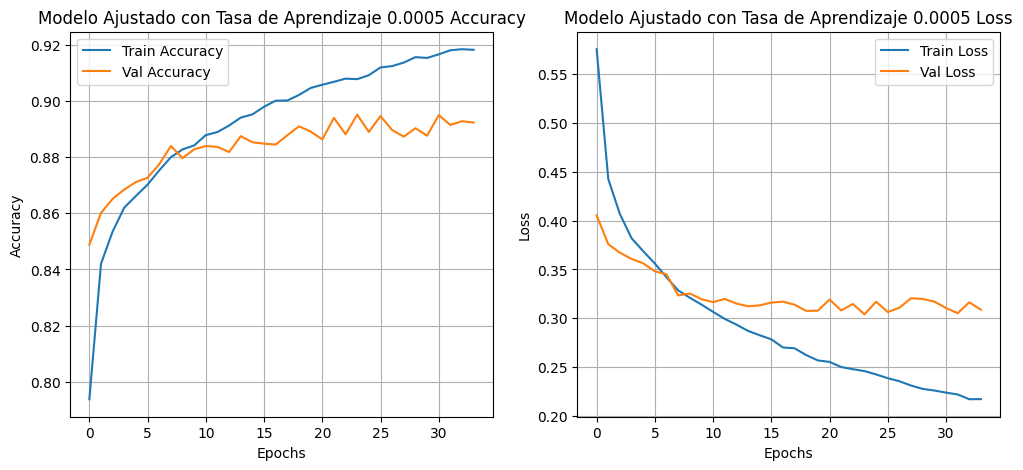

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.80      0.81      1000
       Dress       0.85      0.93      0.89      1000
        Coat       0.83      0.80      0.81      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.72      0.71      0.71      1000
     Sneaker       0.92      0.97      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Importar las librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Cargar el conjunto de datos Fashion MNIST
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Aplanar las imágenes de 28x28 a un vector de 784
N = X_train.shape[1] * X_train.shape[2]  # 784
X_train = X_train.reshape(-1, N)
X_test = X_test.reshape(-1, N)

# Convertir las etiquetas a categorías (one-hot encoding)
C = len(np.unique(Y_train))  # 10
Y_train = keras.utils.to_categorical(Y_train, C)
Y_test = keras.utils.to_categorical(Y_test, C)

# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Función para graficar los resultados de precisión y pérdida
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Gráfica de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.grid()

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Función para mostrar el reporte de clasificación
def show_classification_report(model, X_test, Y_test, target_names):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)
    report = classification_report(Y_true, Y_pred_classes, target_names=target_names)
    print(report)
# Ajustar el modelo con más capas y diferente configuración de Dropout y L2 regularization
model = keras.Sequential([
    Dense(512, input_dim=N, activation='tanh'),
    Dropout(0.2),
    Dense(256, activation='tanh'),
    Dropout(0.2),
    Dense(128, activation='tanh'),
    Dropout(0.2),
    Dense(C, activation='softmax')
])

# Ajustar la tasa de aprendizaje del optimizador 'adam'
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilar el modelo
model.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definir Early Stopping con mayor paciencia
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
history = model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_split=0.1, callbacks=[early_stopping], verbose=2)

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Precisión en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)

# Graficar resultados del modelo
plot_model_history(history, "Modelo Ajustado con Tasa de Aprendizaje 0.0005")

# Mostrar el reporte de clasificación
show_classification_report(model, X_test, Y_test, class_names)




Justificar y hacer análisis aquí.


Utilizamos Dropout y Early Stopping como técnicas de regularización. Dropout, con una tasa del 20%, apagó aleatoriamente neuronas durante el entrenamiento para prevenir el sobreajuste al reducir la co-adaptación de las neuronas. Early Stopping, con una paciencia de 10 épocas, detuvo el entrenamiento cuando la pérdida de validación dejó de mejorar, evitando el sobreentrenamiento y reduciendo el tiempo de computación. Ambas técnicas se complementaron, con Dropout siendo particularmente efectivo en evitar el sobreajuste y Early Stopping asegurando que el entrenamiento se detuviera en el momento óptimo. La arquitectura final del modelo incluyó capas densas con 512, 256 y 128 neuronas, todas con activación tanh, seguidas de Dropout, y una capa de salida softmax con 10 neuronas. El optimizador Adam, con una tasa de aprendizaje de 0.0005, fue utilizado para un ajuste más fino de los pesos. Este modelo logró una precisión de prueba de 89.27% y una pérdida de 0.3125, mostrando una excelente capacidad de generalización y evitando el sobreajuste, gracias a las técnicas de regularización implementadas.

## Parte 4. Optimizadores y Normalización

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar.
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida.

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Otro* } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ __ capas } & \text { __ epocas} & {} & {} & {} & {} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$

*Especificar el nombre del optimizador

Fundamentar la importancia que tienen las funciones de optimización, en qué influye escoger el optimizador adecuado para el modelo basándose en el desempeño y en la tasa de aprendizaje fija versus una adaptativa.

## Parte 5. Redes Convolucionales

Implementen en este apartado una nueva solución a la problemática planteada. La idea es conservar el número de neuronas, número de capas y todo lo que crean necesario, con el fin de hacer una comparación entre el resultado obtenido con MLP y ahora con una arquitectura Convolucional (CNN)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

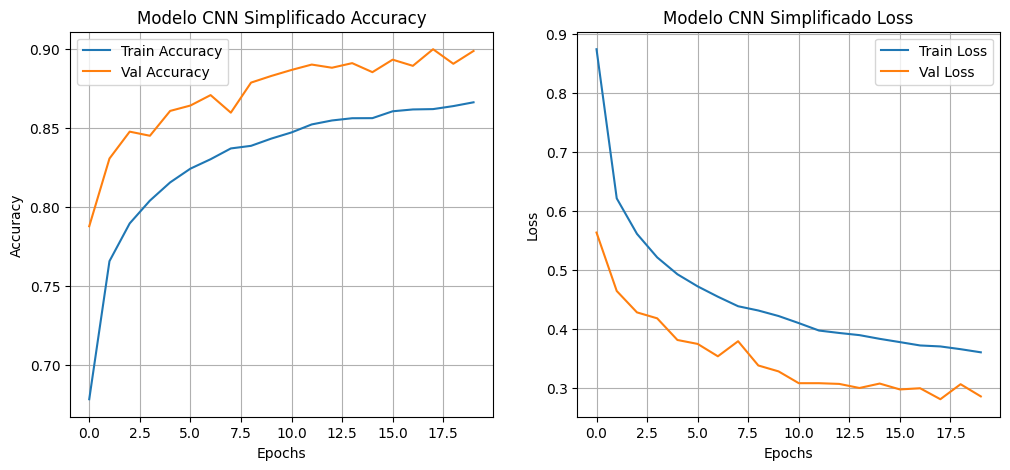

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.81      0.84      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.82      0.83      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.67      0.76      0.71      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el conjunto de datos Fashion MNIST
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionar los datos para que sean compatibles con las capas convolucionales
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convertir las etiquetas a categorías (one-hot encoding)
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

# Definir el generador de datos con aumento
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Ajustar el generador a los datos de entrenamiento
datagen.fit(X_train)

# Definir el modelo CNN
model_cnn = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


# Imprimimos Arquitectura
model_cnn.summary()


# Ajustar la tasa de aprendizaje del optimizador 'adam'
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compilar el modelo
model_cnn.compile(optimizer=adam_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Definir Early Stopping con mayor paciencia
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con los datos aumentados y Early Stopping
history_cnn = model_cnn.fit(datagen.flow(X_train, Y_train, batch_size=128),
                            epochs=20,
                            validation_data=(X_test, Y_test),
                            callbacks=[early_stopping],
                            verbose=2)

# Evaluar el modelo en los datos de prueba
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test, Y_test, verbose=2)
print('Precisión en los datos de prueba:', test_acc_cnn)
print('Pérdida en los datos de prueba:', test_loss_cnn)

# Función para graficar los resultados de precisión y pérdida
def plot_model_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Gráfica de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.grid()

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Función para mostrar el reporte de clasificación
def show_classification_report(model, X_test, Y_test, target_names):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)
    report = classification_report(Y_true, Y_pred_classes, target_names=target_names)
    print(report)

# Graficar resultados del modelo
plot_model_history(history_cnn, "Modelo CNN Simplificado")

# Mostrar el reporte de clasificación
show_classification_report(model_cnn, X_test, Y_test, ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Analizar aquí las diferencias entre ambas arquitecturas y modelos construídos.

## Parte 6. Detallar la segunda problemática del caso planteado: Redes Recurrentes Parte 1

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Amazon.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Luego de implementarla, comenten qué diferencias tiene este tipo de red con una MLP a nivel de arquitectura, de parámetros, de hiperparámetros y de casos de uso.

###Modelo RNN-LSTM

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                15800     
                                                                 
 dense_28 (Dense)            (None, 10)                510       
                                                                 
Total params: 16310 (63.71 KB)
Trainable params: 16310 (63.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 24s 23ms/step - loss: 0.7150 - accuracy: 0.7459 - val_loss: 0.5287 - val_accuracy: 0.8092
Epoch 2/10
938/938 [==============================] - 16s 18ms/step - loss: 0.4744 - accuracy: 0.8259 - val_loss: 0.4561 - val_accuracy: 0.8334
Epoch 3/10
938/938 [==============================] - 22s 23ms/step - loss: 0.4188 - accuracy: 0.8465 - val_loss: 0.4218 - val

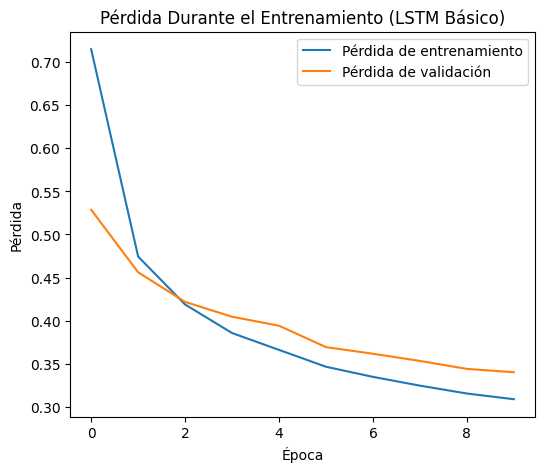

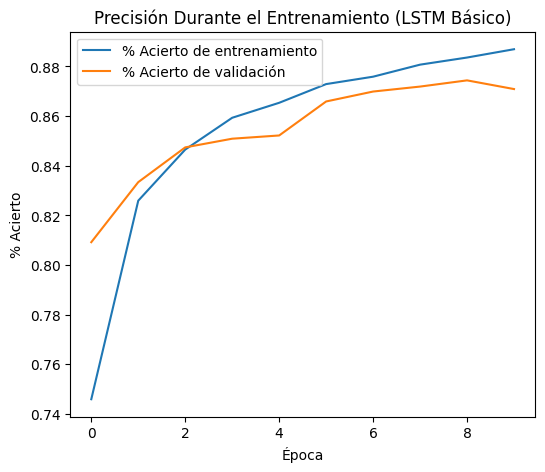

In [ ]:
#####################################################################

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Construcción del modelo LSTM básico
model_basic_lstm = Sequential([
    LSTM(50, input_shape=(28, 28)),  # Una capa LSTM con 50 unidades
    Dense(10, activation='softmax')  # Capa densa de salida con 10 unidades (para clasificación de 10 clases)
])

# Compilación del modelo
model_basic_lstm.compile(optimizer=Adam(),
                         loss=CategoricalCrossentropy(),
                         metrics=['accuracy'])

# Resumen del modelo
model_basic_lstm.summary()

# Entrenamiento del modelo
history_basic_lstm = model_basic_lstm.fit(train_images,
                                          train_labels,
                                          epochs=10,
                                          validation_data=(test_images, test_labels),
                                          batch_size=64,  # Uso de batch_size
                                          verbose=1)

# Evaluar el modelo
test_loss_basic_lstm, test_accuracy_basic_lstm = model_basic_lstm.evaluate(test_images, test_labels)
train_loss_basic_lstm, train_accuracy_basic_lstm = model_basic_lstm.evaluate(train_images, train_labels)

print('=== Resultados del Modelo LSTM Básico ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss_basic_lstm, test_accuracy_basic_lstm * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss_basic_lstm, train_accuracy_basic_lstm * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_basic_lstm.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_basic_lstm.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_basic_lstm.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_basic_lstm.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (LSTM Básico)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.4. Mejor resultado con Recurrente Amazon }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Escribir análisis aquí.

## Parte 7.  Detallar la tercera problemática del caso planteado: Redes Recurrentes Parte 2.

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Twitter.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Analicen el impacto de este tipo de solución, basándose en el estado del arte y en el campo de análisis de sentimiento y procesamiento de lenguaje natural en deep learning.


###Modelo RNN-LSTM Bidireccional con early stopping y dropout

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 28, 512)           583680    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 28, 512)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 64)                16448     
                                                                 
 dense_45 (Dense)            (None, 10)              

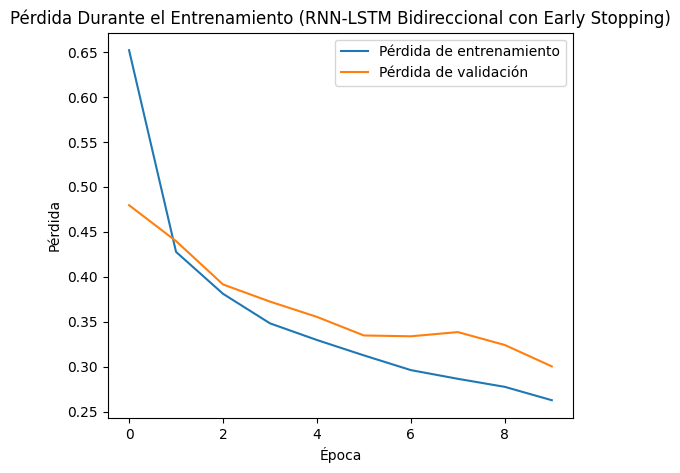

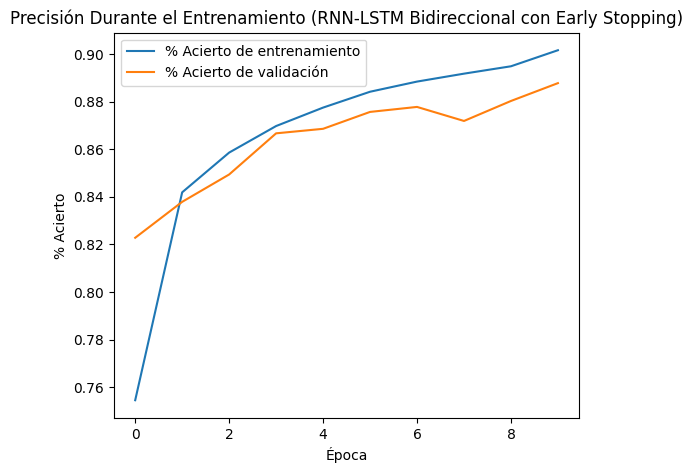

In [ ]:
#####################################################################
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Definir el modelo RNN-LSTM Bidireccional con Early Stopping
model_bidirectional_lstm_early_stopping = Sequential([
    InputLayer(input_shape=(28, 28)),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(128)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_bidirectional_lstm_early_stopping.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_bidirectional_lstm_early_stopping.summary()

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
history_bidirectional_lstm_early_stopping = model_bidirectional_lstm_early_stopping.fit(
    train_images,
    train_labels,
    epochs=10,  # Mayor número de épocas para observar Early Stopping
    validation_data=(test_images, test_labels), batch_size=256,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar el modelo
test_loss, test_accuracy = model_bidirectional_lstm_early_stopping.evaluate(test_images, test_labels)
train_loss, train_accuracy = model_bidirectional_lstm_early_stopping.evaluate(train_images, train_labels)

print('=== Resultados del Modelo RNN-LSTM Bidireccional con Early Stopping ===')
print('Conjunto de Prueba - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(test_loss, test_accuracy * 100))
print('Conjunto de Entrenamiento - Pérdida: {:.4f}, Precisión: {:.2f}%'.format(train_loss, train_accuracy * 100))

# Visualizar pérdida y precisión
plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm_early_stopping.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_bidirectional_lstm_early_stopping.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida Durante el Entrenamiento (RNN-LSTM Bidireccional con Early Stopping)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history_bidirectional_lstm_early_stopping.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history_bidirectional_lstm_early_stopping.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión Durante el Entrenamiento (RNN-LSTM Bidireccional con Early Stopping)')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

## Parte 9. Implementación Arquitecturas Especializadas

Fundamentar detalladamente en este apartado cómo podríamos generar una solución para su caso de estudio, considerando el uso de redes especializadas. De este apartado depende un futuro proyecto, por lo que recuerden especificarlo bien y considerar todos los detalles necesarios considerando tecnología, beneficios, problema a resolver, contexto socio-cultural, etc.


**IMPORTANTE:** Para efectos del ET, se deben ajustar sistemáticamente los hiperparámetros del modelo que están construyendo, independiente de los ajustes que se realizan en cada actividad para aprender el uso específico y puntual de los diferentes hiperparámetros. El modelo final que presenten en el ET, debe considerar la mejor combinación de hiperparámetros y sus ajustes revisados en el transcurso del desarrollo de la asignatura.